# <font color='#2B17B0'>CIENCIA DE DATOS APLICADA A FINANZAS</font>
Carlos Crespo Elizondo<br>
EGADE BUSINESS SCHOOL

# <font color='#2B17B0'>Pares de promedios móviles más eficientes</font>

## Importar librerías

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import itertools #para hacer los pares de promedios móviles
import datetime

import seaborn as sns
sns.set_style('darkgrid')

from herramientas import herramientas_financieras as hf

## Preparación de los datos

### Importar componentes del IPC

En la siguiente celda, importaré los componentes del Índice de Precios al Consumidor (IPC) utilizando la función `ipc` de la librería de Herramientas Financieras.

In [2]:
ipc = hf.ipc()

In [3]:
ipc

['^MXX',
 'AC.MX',
 'ALFAA.MX',
 'ALSEA.MX',
 'ASURB.MX',
 'BBAJIOO.MX',
 'BIMBOA.MX',
 'BOLSAA.MX',
 'CEMEXCPO.MX',
 'CUERVO.MX',
 'ELEKTRA.MX',
 'FEMSAUBD.MX',
 'GAPB.MX',
 'GCARSOA1.MX',
 'GCC.MX',
 'GENTERA.MX',
 'GFINBURO.MX',
 'GFNORTEO.MX',
 'GMEXICOB.MX',
 'GRUMAB.MX',
 'KIMBERA.MX',
 'KOFUBL.MX',
 'LABB.MX',
 'LIVEPOLC-1.MX',
 'MEGACPO.MX',
 'OMAB.MX',
 'ORBIA.MX',
 'PE&OLES.MX',
 'PINFRA.MX',
 'Q.MX',
 'RA.MX',
 'TLEVISACPO.MX',
 'VESTA.MX',
 'VOLARA.MX',
 'WALMEX.MX']

### Cargar precios de los componentes del IPC del 2020 al presente

Ahora, procederé a cargar los precios de cada uno de los componentes del IPC. Para hacer esto, utilizaré la función `precios` que se encuentra en la misma librería de Herramientas Financieras.

In [4]:
precios = hf.precios(ipc, '2020-01-01')

In [5]:
precios.info()

<class 'pandas.core.frame.DataFrame'>
Index: 861 entries, 2020-01-02 to 2023-06-01
Data columns (total 35 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ^mxx        861 non-null    float64
 1   ac          860 non-null    float64
 2   alfaa       860 non-null    float64
 3   alsea       860 non-null    float64
 4   asurb       860 non-null    float64
 5   bbajioo     860 non-null    float64
 6   bimboa      860 non-null    float64
 7   bolsaa      860 non-null    float64
 8   cemexcpo    860 non-null    float64
 9   cuervo      860 non-null    float64
 10  elektra     860 non-null    float64
 11  femsaubd    860 non-null    float64
 12  gapb        860 non-null    float64
 13  gcarsoa1    860 non-null    float64
 14  gcc         860 non-null    float64
 15  gentera     860 non-null    float64
 16  gfinburo    860 non-null    float64
 17  gfnorteo    860 non-null    float64
 18  gmexicob    860 non-null    float64
 19  grumab      860 no

Observando los datos, podemos notar que todos los componentes del IPC tienen 860 observaciones, excepto el índice del IPC, que tiene 861. Esto es debido a un error proveniente de Yahoo Finance: no disponen de los precios correspondientes al 10 de marzo de 2023.

### Error de Yahoo Finance en los datos del 10 de marzo, 2023

In [6]:
precios.loc['2023-03-10']

^mxx          52794.53125
ac                    NaN
alfaa                 NaN
alsea                 NaN
asurb                 NaN
bbajioo               NaN
bimboa                NaN
bolsaa                NaN
cemexcpo              NaN
cuervo                NaN
elektra               NaN
femsaubd              NaN
gapb                  NaN
gcarsoa1              NaN
gcc                   NaN
gentera               NaN
gfinburo              NaN
gfnorteo              NaN
gmexicob              NaN
grumab                NaN
kimbera               NaN
kofubl                NaN
labb                  NaN
livepolc-1            NaN
megacpo               NaN
omab                  NaN
orbia                 NaN
pe&oles               NaN
pinfra                NaN
q                     NaN
ra                    NaN
tlevisacpo            NaN
vesta                 NaN
volara                NaN
walmex                NaN
Name: 2023-03-10, dtype: float64

### Corregir error interpolando los precios previos y posteriores al 10 de marzo

Como saben, existen varias maneras de corregir la ausencia de datos en una serie de tiempo. En este caso, dado que solo se trata de una única omisión, optaré por interpolar los precios. Para esto, utilizaré los precios del día anterior (9 de marzo) y del día posterior (13 de marzo) al 10 de marzo.

In [7]:
dia_anterior = precios.loc[:'2023-03-10'].iloc[-2]
dia_posterior = precios.loc['2023-03-10':].iloc[1]

In [8]:
dia_anterior.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, ^mxx to walmex
Series name: 2023-03-09
Non-Null Count  Dtype  
--------------  -----  
35 non-null     float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [9]:
dia_posterior.info()

<class 'pandas.core.series.Series'>
Index: 35 entries, ^mxx to walmex
Series name: 2023-03-13
Non-Null Count  Dtype  
--------------  -----  
35 non-null     float64
dtypes: float64(1)
memory usage: 1.6+ KB


In [10]:
precios.loc['2023-03-10'] = (dia_anterior + dia_posterior)/2
precios.sort_index(inplace=True)

In [11]:
precios.loc['2023-03-10']

^mxx          53219.509765
ac              153.144241
alfaa            11.879932
alsea            40.355002
asurb           536.409912
bbajioo          64.244616
bimboa           85.060414
bolsaa           34.032112
cemexcpo          9.520000
cuervo           45.605000
elektra         945.561157
femsaubd        161.813720
gapb            335.819687
gcarsoa1         87.135002
gcc             139.926544
gentera          17.962150
gfinburo         39.510001
gfnorteo        155.629998
gmexicob         81.138760
grumab          263.444992
kimbera          34.898067
kofubl          138.383918
labb             15.095000
livepolc-1      112.310745
megacpo          46.278785
omab            187.639999
orbia            36.921461
pe&oles         228.659996
pinfra          179.805001
q               109.606831
ra              148.378448
tlevisacpo       17.726914
vesta            53.327747
volara           21.470000
walmex           72.264698
Name: 2023-03-10, dtype: float64

## Evaluar diferentes pares de promédios móviles sin ventas en corto

Para calcular cada par de promedios móviles, utilizaré distintos números de la serie Fibonacci. Cada par será procesado mediante la función `promedios_moviles`. Los resultados correspondientes a cada acción, para cada par de promedios móviles, se almacenarán en el DataFrame `df_resultados`.

### Función promedios_moviles

La función `promedios_moviles` regresa los promedios móviles de manera vectorizada. Esta función toma un DataFrame que contiene los precios de las acciones y dos ventanas para los promedios móviles como parámetros. A partir de estos parámetros, genera un DataFrame para cada etapa en el cálculo de los promedios móviles.

Para mantener la consistencia en la longitud de los DataFrames, procedo a eliminar todas las filas con NaN's en el DataFrame `df_pm2`. El rango de fechas de `df_pm2` se utiliza después para acotar los DataFrames de los precios, retornos y del promedio móvil a corto plazo.

Finalmente, calculo el DataFrame que refleja las posiciones en el mercado, representadas con 1's y 0's, dado que no estamos empleando ventas en corto. Adicionalmente, genero el DataFrame que almacena los retornos de la estrategia.

In [12]:
def promedios_moviles(df, promedio_movil1, promedio_movil2):

    df_retornos = np.log(df / df.shift(1))
    df_pm1 = precios.rolling(promedio_movil1).mean()
    df_pm2 = precios.rolling(promedio_movil2).mean()
    
    df_pm2.dropna(inplace=True)
    
    df = df.loc[df_pm2.index]
    df_retornos = df_retornos.loc[df_pm2.index]
    df_pm1 = df_pm1.loc[df_pm2.index]
    
    df_posicion = pd.DataFrame(np.where(df_pm1 > df_pm2, 1, 0), index=df.index, columns=df.columns)
    df_estrategia = df_retornos * df_posicion.shift(1)
    
    return df_estrategia.sum().sort_values(ascending=False)

### Generar pares de promedios móviles a partir de varios componente de la serie Fibonacci

En la siguiente celda de código, generaré diferentes pares de promedios móviles a partir de la serie Fibonacci. Decidí no utilizar los números 1, 2, 3 y 5, ya que estos podrían generar un número elevado de señales de compra y venta. Es importante considerar que estas transacciones pueden tener un impacto significativo en el rendimiento final de las estrategias, especialmente si tomamos en cuenta los costos asociados que el bróker carga por cada transacción realizada.

In [13]:
fibonacci = [8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987]
combinaciones = list(itertools.combinations(fibonacci, 2))

In [14]:
combinaciones

[(8, 13),
 (8, 21),
 (8, 34),
 (8, 55),
 (8, 89),
 (8, 144),
 (8, 233),
 (8, 377),
 (8, 610),
 (8, 987),
 (13, 21),
 (13, 34),
 (13, 55),
 (13, 89),
 (13, 144),
 (13, 233),
 (13, 377),
 (13, 610),
 (13, 987),
 (21, 34),
 (21, 55),
 (21, 89),
 (21, 144),
 (21, 233),
 (21, 377),
 (21, 610),
 (21, 987),
 (34, 55),
 (34, 89),
 (34, 144),
 (34, 233),
 (34, 377),
 (34, 610),
 (34, 987),
 (55, 89),
 (55, 144),
 (55, 233),
 (55, 377),
 (55, 610),
 (55, 987),
 (89, 144),
 (89, 233),
 (89, 377),
 (89, 610),
 (89, 987),
 (144, 233),
 (144, 377),
 (144, 610),
 (144, 987),
 (233, 377),
 (233, 610),
 (233, 987),
 (377, 610),
 (377, 987),
 (610, 987)]

### Evaluación de cada par de promedios móviles

Para la evaluación de cada par de promedios móviles, implementaré un 'for loop' que llamará a la función `promedios_moviles`. El resultado de esta función será integrado en el DataFrame `df_resultados`. Además, asignaré como "label" de cada columna los valores correspondientes a los promedios móviles utilizados en cada iteración del "for loop".

In [15]:
df_resultados = pd.DataFrame()

In [16]:
for par in combinaciones:
    s_retornos_pm = promedios_moviles(precios, par[0], par[1])    
    df_resultados[f'{par[0]}-{par[1]}'] = s_retornos_pm
    del s_retornos_pm

In [17]:
df_resultados = np.exp(df_resultados)  - 1

### Resultados

#### HeatMap

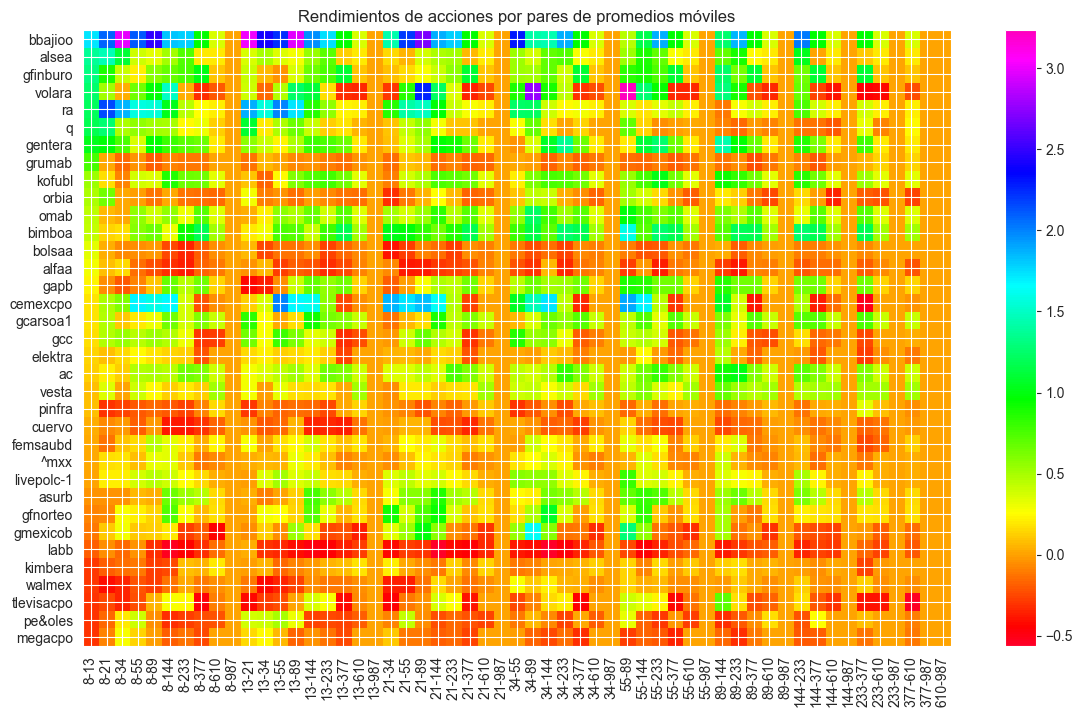

In [18]:
plt.figure(figsize=(14, 8))
plt.title('Rendimientos de acciones por pares de promedios móviles')
plt.imshow(df_resultados, cmap='gist_rainbow', aspect='auto')
plt.colorbar()
plt.xticks(range(len(df_resultados.columns)), df_resultados.columns, rotation=90)
plt.yticks(range(len(df_resultados)), df_resultados.index)

plt.show();

#### Tabla

In [19]:
df_resultados

,8-13,8-21,8-34,8-55,8-89,8-144,8-233,8-377,8-610,8-987,...,144-233,144-377,144-610,144-987,233-377,233-610,233-987,377-610,377-987,610-987
bbajioo,1.725979,2.077351,2.990666,2.114963,2.479077,1.812721,1.789858,0.954879,0.358888,0.0,...,2.018180,0.954879,0.358888,0.0,0.954879,0.358888,0.0,0.358888,0.0,0.0
alsea,1.368243,1.457323,1.102275,0.388547,0.326245,0.505433,0.729317,0.201864,0.193894,0.0,...,1.034028,0.000701,0.193894,0.0,0.115086,0.193894,0.0,0.193894,0.0,0.0
gfinburo,1.316448,0.879185,0.409613,0.212168,0.583169,0.670023,0.750976,1.006492,0.088682,0.0,...,0.651902,1.094262,0.088682,0.0,1.094262,0.088682,0.0,0.088682,0.0,0.0
volara,1.253571,0.504553,0.031173,0.642510,0.975560,1.507973,0.036048,-0.317151,-0.198471,0.0,...,0.677849,-0.260660,-0.389990,0.0,-0.455076,-0.427876,0.0,-0.231839,0.0,0.0
ra,1.213821,2.162045,1.866651,1.578042,1.547515,1.037335,0.447480,0.264437,0.217986,0.0,...,0.754390,0.382937,0.217986,0.0,0.382937,0.217986,0.0,0.217986,0.0,0.0
q,1.178952,1.266616,0.480749,0.554769,0.513213,0.495830,0.238067,0.300891,0.126775,0.0,...,-0.121257,-0.129198,-0.202659,0.0,0.323450,-0.083535,0.0,0.239973,0.0,0.0
gentera,1.024044,0.971702,0.753136,0.360912,0.950189,0.787075,0.709261,0.666532,0.205777,0.0,...,0.860278,0.609301,0.205777,0.0,0.781153,0.205777,0.0,0.205777,0.0,0.0
grumab,0.764709,0.027609,-0.159364,-0.034664,-0.190712,-0.088206,-0.111272,-0.118072,0.007113,0.0,...,-0.081326,-0.207258,-0.009063,0.0,0.046355,0.140138,0.0,0.140138,0.0,0.0
kofubl,0.532375,0.166084,-0.083447,0.370793,0.344178,0.868051,0.653558,0.650350,0.328914,0.0,...,0.846480,0.650350,0.328914,0.0,0.522050,0.328914,0.0,0.328914,0.0,0.0
orbia,0.480646,0.643026,0.015658,-0.001117,-0.124940,0.027457,-0.131802,-0.135266,-0.154880,0.0,...,0.153634,-0.013821,-0.348650,0.0,-0.181888,-0.213034,0.0,-0.262369,0.0,0.0


### Identificación del par de promedios móviles con mayor rendimiento para cada acción

Para identificar el par de promedios móviles que genera el mayor rendimiento para cada acción, seguiré los siguientes pasos:

1. Buscaré en qué columna (correspondiente a un par de promedios móviles) se encuentra el retorno máximo para cada fila (que representa una acción)
1. Identificaré el valor máximo de cada renglón
1. Crearé el DataFrame `df_maximo`, que contendrá, para cada acción, el par de promedios móviles que le generó el mayor rendimiento, junto con el rendimiento obtenido.

In [20]:
columna_max = df_resultados.idxmax(axis=1)
valor_max = df_resultados.max(axis=1)
df_maximos = pd.DataFrame({'col_max': columna_max, 'valor_max': valor_max})

In [21]:
df_maximos

,col_max,valor_max
bbajioo,13-21,3.016599
alsea,8-21,1.457323
gfinburo,8-13,1.316448
volara,55-89,3.233615
ra,8-21,2.162045
q,8-21,1.266616
gentera,89-144,1.434529
grumab,8-13,0.764709
kofubl,55-233,1.022707
orbia,8-21,0.643026


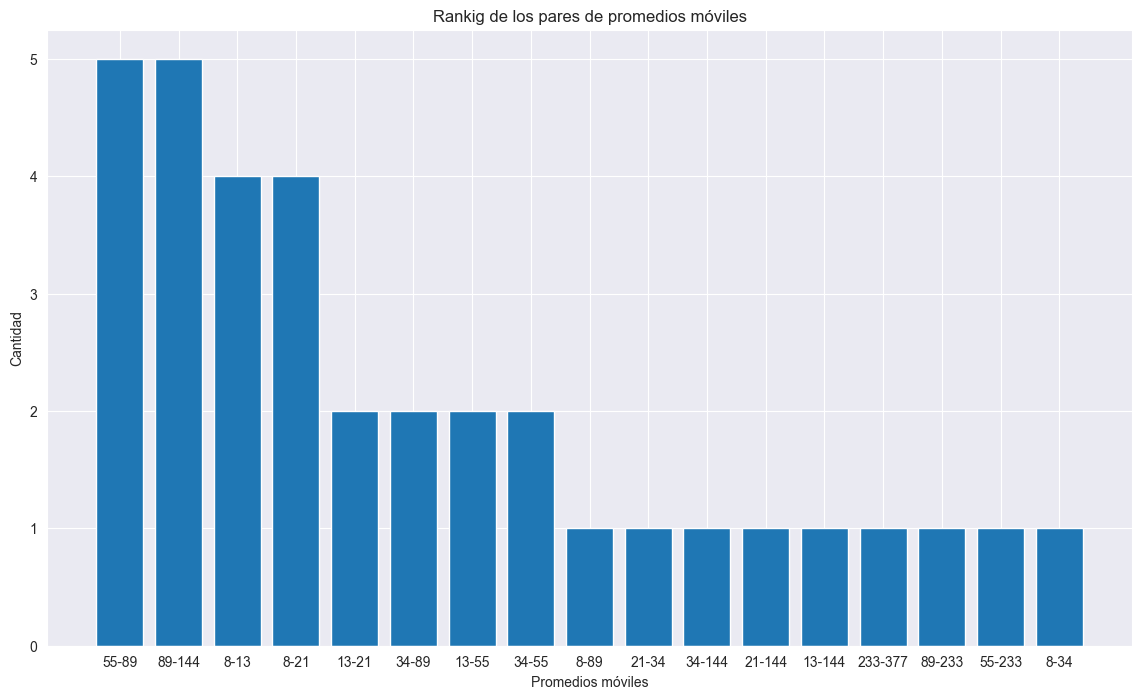

In [22]:
contar_promedios = df_maximos['col_max'].value_counts()

# Create a bar plot using Matplotlib
plt.figure(figsize=(14, 8))
plt.bar(contar_promedios.index, contar_promedios.values)
plt.xlabel('Promedios móviles')
plt.ylabel('Cantidad')
plt.title('Rankig de los pares de promedios móviles');

## Conclusiones

Observando los datos, podemos ver que no existe un único par de promedios móviles que sea el "ganador" para todas las acciones. Por ejemplo, la acción "bbajioo" tuvo su rendimiento máximo con el par de promedios móviles 13-21, mientras que "gentera" lo obtuvo con el par 89-144, y "volara" con el par 55-89. Esto indica que cada acción responde de manera diferente a los promedios móviles y sugiere que la elección del par de promedios móviles debe hacerse a nivel de cada acción, en lugar de buscar un único par que funcione para todas.

Sin embargo, es posible notar algunas tendencias. Por ejemplo, el par de promedios móviles 55-89 o el par 89-144 parece rendir bastante bien para un número considerable de acciones, lo que podría sugerir que es un buen par a considerar en una estrategia de trading.